In [57]:
%config IPCompleter.greedy=True

In [101]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import harmonic

In [59]:
results = pd.read_csv('perms_100_10000_100_500.csv')

In [60]:
summary = results.groupby('n').agg([np.min, np.max, np.mean, np.var, np.std])
summary

cycles                                 records                        \
        amin amax   mean       var       std    amin amax   mean       var   
n                                                                            
100        1   14  5.198  3.862521  1.965330       1   11  5.332  3.629034   
200        1   13  5.896  4.189563  2.046842       1   14  5.892  4.060457   
300        1   15  6.250  4.909319  2.215698       1   13  6.366  4.573190   
400        1   14  6.600  4.973948  2.230235       1   14  6.528  4.494204   
500        1   16  6.924  5.268762  2.295378       1   14  6.666  5.293030   
...      ...  ...    ...       ...       ...     ...  ...    ...       ...   
9600       3   21  9.692  8.421980  2.902065       3   17  9.842  7.672381   
9700       3   19  9.838  8.821399  2.970084       3   19  9.626  7.813752   
9800       3   23  9.984  7.771287  2.787703       2   21  9.862  8.419796   
9900       2   19  9.852  8.194485  2.862601       3   20  9.942  8.118874   
10000      2   20  9.970  7.957014  2.820818       2   20  9.754  8.518521   

                fixed_points                                  
            std         amin amax   mean       var       std  
n                                                             
100    1.905002            0    5  1.012  1.090036  1.044048  
200    2.015058            0    4  0.972  0.937090  0.968034  
300    2.138502            0    5  1.042  1.034305  1.017008  
400    2.119954            0    5  1.062  1.044244  1.021883  
500    2.300659            0    5  1.068  1.069515  1.034174  
...         ...          ...  ...    ...       ...       ...  
9600   2.769906            0    5  1.026  1.051427  1.025391  
9700   2.795309            0    5  1.040  1.024449  1.012151  
9800   2.901688            0    5  1.140  1.134669  1.065209  
9900   2.849364            0    5  1.026  0.999323  0.999661  
10000  2.918651            0    5  1.020  0.925451  0.962004  

[100 rows x 15 columns]

# Badanie koncentracji - nierówność Czebyszewa

In [61]:
fixed_points = summary['fixed_points']

Podobnie, jak w przypadku poprzedniej listy, do badania koncentracji poszczególnych badanych wartości (punkty stałe, liczba cykli i liczba rekordów) zostanie wykorzystana nierówność Czebyszewa. Definiuje się ją za pomocą następującego wzoru:

$P(|X - E(X)| \geq t) \leq \frac{\mathrm{Var}(X)}{t^2}$

Przyjmijmy, że $\frac{\mathrm{Var}(X)}{t^2} = 0.05$.

Stąd można wyliczyć $t = \sqrt{\frac{\mathrm{Var}(X)}{0.05}}$

Zbadajmy teraz wartość $t$ dla punktów stałych permutacji losowej. 

In [62]:
def compute_t(data):
    return np.sqrt(data['var'] / 0.05)

In [63]:
t = compute_t(fixed_points)

Dalej, z nierówności wiemy, że $|X - E(X)| \leq t$. Możemy stąd wyliczyć górne oraz dolne ograniczenia:

$X_u = E(X) + t$

$X_l = E(X) - t$

In [64]:
def compute_chebyshev_bounds(data, t):
    return data['mean'] + t, data['mean'] - t

In [65]:
x_u, x_l = compute_chebyshev_bounds(fixed_points, t)

Ponandto, na podstawie analizy przedstawionej w książce _Analytic combinatorics - P. Flajolet, R.Sedgewick_, wiadomo, że wartość oczekiwana dla liczby punktów stałych wynosi 1.

In [66]:
th_ex = np.ones(100)

In [67]:
def draw_plot(data, x_u, x_l, th_ex):
    x = np.linspace(100, 10000, 100)
    fix, ax = plt.subplots(figsize=(15,12))
    ax.plot(x, data['amin'], label="min")
    ax.plot(x, data['amax'], label="max")
    ax.plot(x, data['mean'], label="mean")
    ax.plot(x, x_u, label="chebyshev_upper")
    ax.plot(x, x_l, label="chebyshev_lower")
    ax.plot(x, th_ex, label="th_ex")
    ax.legend()

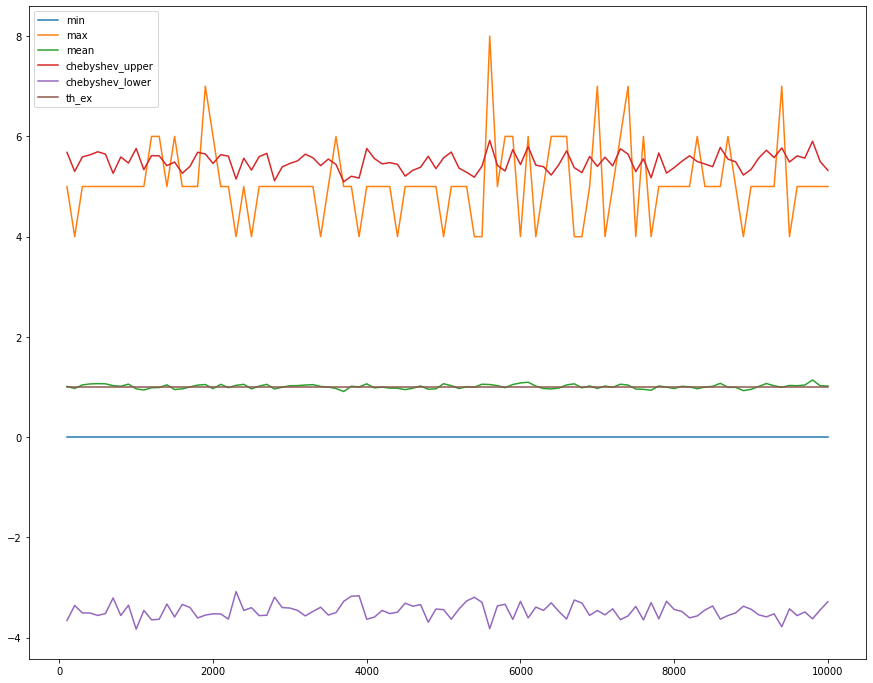

In [68]:
draw_plot(fixed_points, x_u, x_l, th_ex)

Ponadto, wybierzmy teraz losowe, duże $n$ i narysujmy dla niego histogram jak rozłożyły się dane w próbach dla danego $n$:

In [140]:
def draw_hist(data, key):
    rnd_n = random.randint(50, 99)
    rnd_n = 100 + 100 * rnd_n
    
    data[key][rnd_n:rnd_n+400].plot.hist(bins=10)

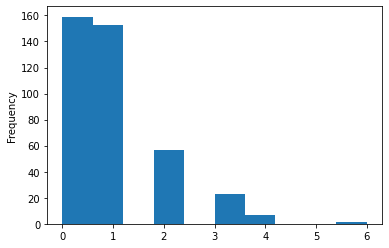

In [141]:
draw_hist(results, 'fixed_points')

Wykonajmy teraz podobne obliczenia dla liczby cykli oraz rekordów. Z analizy ze wspomianej wcześniej książki, wiemy, że wartości oczekiwane dla tych wielkości są takie same i są równe n-tej liczbie harmonicznej.

In [69]:
th_ex = [harmonic(n) for n in range(100, 10001, 100)]

In [70]:
cycles = summary['cycles']

In [71]:
t = compute_t(cycles)

In [72]:
x_u, x_l = compute_chebyshev_bounds(cycles, t)

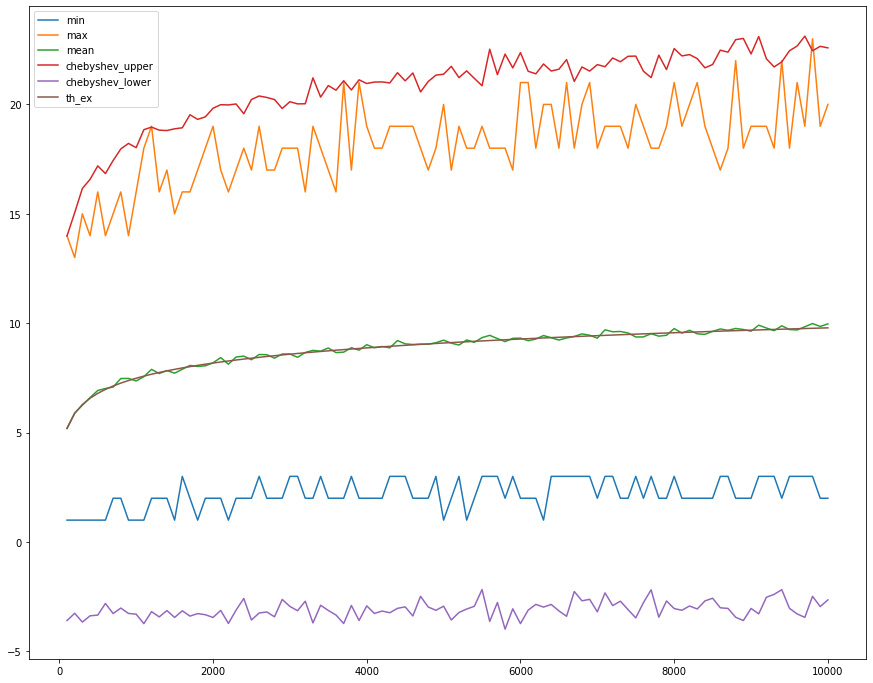

In [73]:
draw_plot(cycles, x_u, x_l, th_ex)

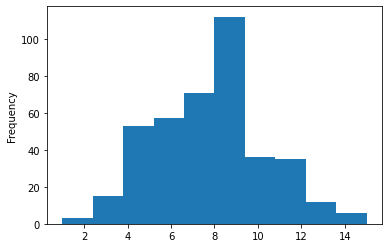

In [142]:
draw_hist(results, 'cycles')

In [74]:
records = summary['records']

In [75]:
t = compute_t(records)

In [76]:
x_u, x_l = compute_chebyshev_bounds(records, t)

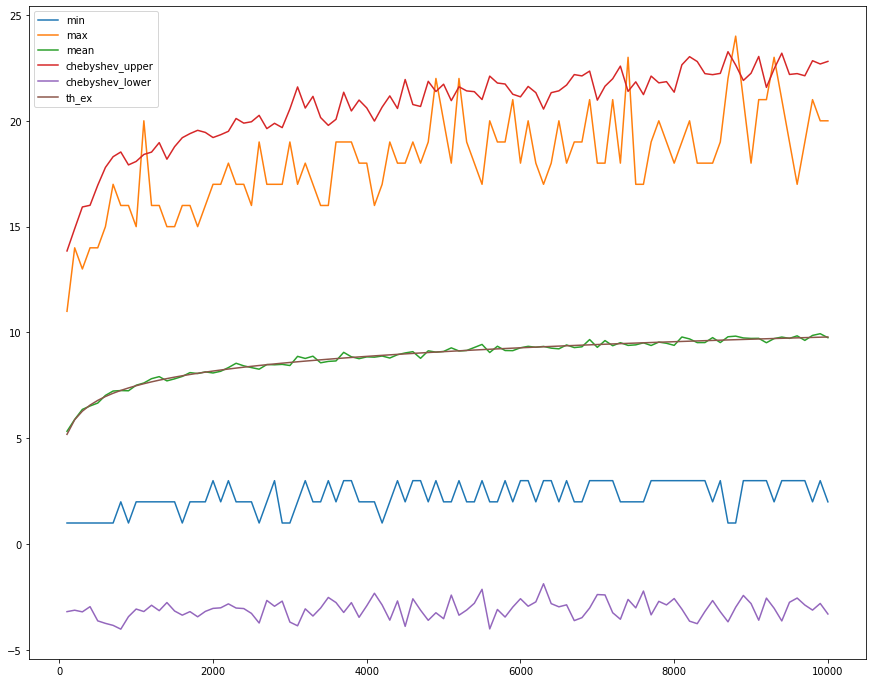

In [77]:
draw_plot(records, x_u, x_l, th_ex)

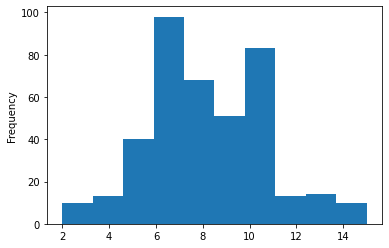

In [143]:
draw_hist(results, 'records')